In [2]:
from keras import metrics
from model import neural_voice_judgment_model
import idx2numpy
from os.path import join
import numpy as np
from sample_yomikomi import sample_all_data
from keras.callbacks import EarlyStopping
import tensorflow as tf
from twenty_times_more_data import twenty_times_more_data
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Model

In [3]:
test_label_data = idx2numpy.convert_from_file(join("..","dataset","test_label.idx"))
test_image_data = idx2numpy.convert_from_file(join("..","dataset","test_image.idx"))
input_output_train_label_data = idx2numpy.convert_from_file(join("..","dataset","train_label.idx"))
input_output_train_image_data = idx2numpy.convert_from_file(join("..","dataset","train_image.idx"))
input_output_validation_label_data = idx2numpy.convert_from_file(join("..","dataset","validation_label.idx"))
input_output_validation_image_data = idx2numpy.convert_from_file(join("..","dataset","validation_image.idx"))

In [4]:
model = neural_voice_judgment_model()
model.build((None,128,128,1))
model.summary()
model.compile(optimizer="adam",loss="mean_squared_error",metrics=metrics.TopKCategoricalAccuracy(k=5))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 8)       208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 16)        3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 100)       40100     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 100)      0

In [5]:
train_label_dataset = tf.data.Dataset.from_tensor_slices(input_output_train_label_data)
train_image_dataset = tf.data.Dataset.from_tensor_slices(input_output_train_image_data)
train_lump_dataset = tf.data.Dataset.zip((train_image_dataset,train_label_dataset))
callback = EarlyStopping(patience=10)
flat_map_dataset = train_lump_dataset.flat_map(twenty_times_more_data)

In [6]:
fit_data = model.fit(
    flat_map_dataset,epochs=500,
    steps_per_epoch=45,
    callbacks=[callback],
    validation_data=(input_output_validation_image_data,input_output_validation_label_data),
    validation_steps=1,
)

Epoch 1/500
45/45 [==============================] - 21s 442ms/step - loss: 0.0864 - top_k_categorical_accuracy: 0.5556 - val_loss: 0.1108 - val_top_k_categorical_accuracy: 0.2180
Epoch 2/500
45/45 [==============================] - 20s 440ms/step - loss: 0.0849 - top_k_categorical_accuracy: 0.5333 - val_loss: 0.1207 - val_top_k_categorical_accuracy: 0.1870
Epoch 3/500
45/45 [==============================] - 19s 414ms/step - loss: 0.0792 - top_k_categorical_accuracy: 0.2222 - val_loss: 0.1040 - val_top_k_categorical_accuracy: 0.1750
Epoch 4/500
45/45 [==============================] - 18s 394ms/step - loss: 0.0576 - top_k_categorical_accuracy: 0.5778 - val_loss: 0.1012 - val_top_k_categorical_accuracy: 0.0780
Epoch 5/500
45/45 [==============================] - 19s 425ms/step - loss: 0.0658 - top_k_categorical_accuracy: 0.1778 - val_loss: 0.0991 - val_top_k_categorical_accuracy: 0.0720
Epoch 6/500
45/45 [==============================] - 21s 461ms/step - loss: 0.0648 - top_k_categoric

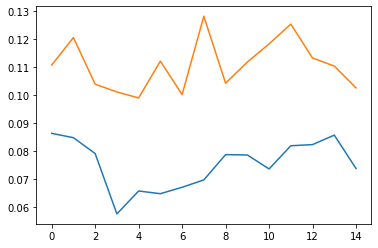

In [7]:
plt.plot(fit_data.history["loss"])
plt.plot(fit_data.history["val_loss"])

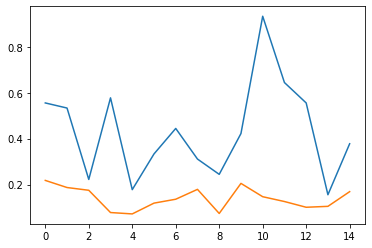

In [8]:
plt.plot(fit_data.history["top_k_categorical_accuracy"])
plt.plot(fit_data.history["val_top_k_categorical_accuracy"])

In [ ]:
model.evaluate(x=test_image_data,y=test_label_data)

In [ ]:
model.save(join("trained_model","fourth.tf"))